In [8]:
import pandas as pd
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')

# Display information about duplicates before removal
print("Number of duplicates before removal:", df.duplicated().sum())

# Remove duplicates
df_no_duplicates = df.drop_duplicates()

# Display information about duplicates after removal
print("Number of duplicates after removal:", df_no_duplicates.duplicated().sum())

# Save the dataset without duplicates to a new CSV file
df_no_duplicates.to_csv('dataset_no_duplicates.csv', index=False)

/var/folders/sw/ydpk7dx52cbd5q0j4xt5kc_r0000gn/T/ipykernel_16612/3883987385.py:2: DtypeWarning: Columns (3,5,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')


Number of duplicates before removal: 1
Number of duplicates after removal: 0


In [9]:
#Missing Values
df = pd.read_csv('dataset_no_duplicates.csv')
print("Original Dataset Info:")
print(df.info())
# Step 1: Drop columns with a high percentage of missing values (adjust threshold as needed)
threshold = 0.8
df = df.dropna(thresh=len(df) * (1 - threshold), axis=1)
# Step 2: Drop rows with missing values
df = df.dropna(axis=0)
#Dropping columns that are not used in computation/analysis
columns_to_drop = ['CRASH TIME','ON STREET NAME','CROSS STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 2','VEHICLE TYPE CODE 2'] 
df = df.drop(columns=columns_to_drop, axis=1)
# Display information about cleaned dataset
print("\nCleaned Dataset Info:")
print(df.info())
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_data.csv', index=False)

/var/folders/sw/ydpk7dx52cbd5q0j4xt5kc_r0000gn/T/ipykernel_16612/3399425813.py:2: DtypeWarning: Columns (3,5,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset_no_duplicates.csv')


Original Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057583 entries, 0 to 2057582
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      object 
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      object 
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     object 
 17  NUMBER OF MOTORIST KILL

In [10]:
from sklearn.preprocessing import MinMaxScaler
# Identify columns with different data types
string_cols = ['BOROUGH','ZIP CODE','LOCATION','CONTRIBUTING FACTOR VEHICLE 1','VEHICLE TYPE CODE 1','CRASH DATE']  # Replace with your string columns
int_cols = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
            'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
            'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID']
float_cols = ['LATITUDE', 'LONGITUDE']  # Replace with your float columns

# Step 1: Normalize numerical columns using Min-Max scaling
numerical_cols = int_cols + float_cols
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 2: Assign specific data types to columns
df_normalized[string_cols] = df_normalized[string_cols].astype(str)
df_normalized['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y')
df_normalized[int_cols] = df_normalized[int_cols].astype(int)
df_normalized[float_cols] = df_normalized[float_cols].astype(float)

# Display information about the normalized and typed dataset
print("\nNormalized and Typed Dataset Info:")
print(df_normalized.info())

# Save the normalized and typed dataset to a new CSV file
df_normalized.to_csv('normalized_typed_data.csv', index=False)


Normalized and Typed Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 886577 entries, 10 to 2057580
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE                     886577 non-null  datetime64[ns]
 1   BOROUGH                        886577 non-null  object        
 2   ZIP CODE                       886577 non-null  object        
 3   LATITUDE                       886577 non-null  float64       
 4   LONGITUDE                      886577 non-null  float64       
 5   LOCATION                       886577 non-null  object        
 6   NUMBER OF PERSONS INJURED      886577 non-null  int64         
 7   NUMBER OF PERSONS KILLED       886577 non-null  int64         
 8   NUMBER OF PEDESTRIANS INJURED  886577 non-null  int64         
 9   NUMBER OF PEDESTRIANS KILLED   886577 non-null  int64         
 10  NUMBER OF CYCLIST INJURED      8865

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load your dataset
df = pd.read_csv('normalized_typed_data.csv')

# Identify categorical columns
categorical_cols = ['BOROUGH', 'VEHICLE TYPE CODE 1', 'CONTRIBUTING FACTOR VEHICLE 1']  # Replace with your categorical columns

# Method 1: Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Method 2: One-Hot Encoding
df_one_hot = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols)

# Display information about the dataset with encoded variables
print("\nDataset Info with Label Encoded Variables:")
print(df.info())

print("\nDataset Info with One-Hot Encoded Variables:")
print(df_one_hot.info())

# Save the datasets with encoded variables to new CSV files
df.to_csv('label_encoded_data.csv', index=False)
df_one_hot.to_csv('one_hot_encoded_data.csv', index=False)

/var/folders/sw/ydpk7dx52cbd5q0j4xt5kc_r0000gn/T/ipykernel_16612/1265958482.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('normalized_typed_data.csv')



Dataset Info with Label Encoded Variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886577 entries, 0 to 886576
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   CRASH DATE                             886577 non-null  object 
 1   BOROUGH                                886577 non-null  object 
 2   ZIP CODE                               886577 non-null  object 
 3   LATITUDE                               886577 non-null  float64
 4   LONGITUDE                              886577 non-null  float64
 5   LOCATION                               886577 non-null  object 
 6   NUMBER OF PERSONS INJURED              886577 non-null  int64  
 7   NUMBER OF PERSONS KILLED               886577 non-null  int64  
 8   NUMBER OF PEDESTRIANS INJURED          886577 non-null  int64  
 9   NUMBER OF PEDESTRIANS KILLED           886577 non-null  int64  
 10  NUMBER OF CY

/var/folders/sw/ydpk7dx52cbd5q0j4xt5kc_r0000gn/T/ipykernel_16612/2386720700.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('normalized_typed_data.csv')


<Figure size 2000x1000 with 0 Axes>

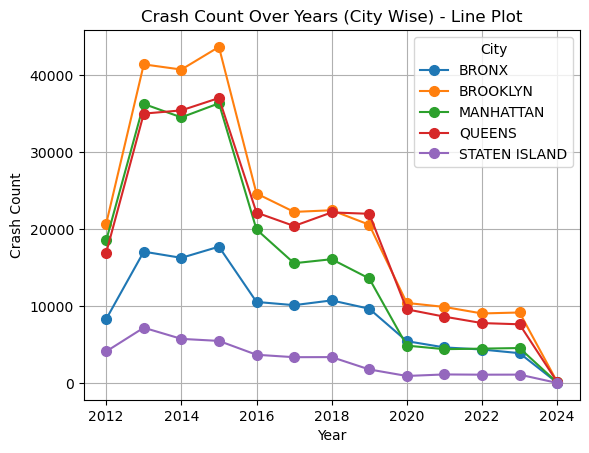

In [12]:
#Crash Count VS Year (City WISE)
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_data.csv' with the actual file path)
data = pd.read_csv('normalized_typed_data.csv')

# Convert 'CRASH DATE' column to datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# Extract year from 'CRASH DATE'
data['Year'] = data['CRASH DATE'].dt.year

# Group by year and city (Borough) and count the number of crashes
crashes_per_year_city = data.groupby(['Year', 'BOROUGH']).size().reset_index(name='Crash Count')

# Pivot the data to have years as rows and cities (Borough) as columns
pivot_table = crashes_per_year_city.pivot(index='Year', columns='BOROUGH', values='Crash Count')

# Line Plot
plt.figure(figsize=(20, 10))
pivot_table.plot(kind='line', marker='o', markersize=7)
plt.title('Crash Count Over Years (City Wise) - Line Plot')
plt.xlabel('Year')
plt.ylabel('Crash Count')
plt.grid(True)
plt.legend(title='City')
plt.show()

/var/folders/sw/ydpk7dx52cbd5q0j4xt5kc_r0000gn/T/ipykernel_16612/366094321.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('normalized_typed_data.csv')  # Replace with your actual dataset file
/var/folders/sw/ydpk7dx52cbd5q0j4xt5kc_r0000gn/T/ipykernel_16612/366094321.py:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'],  errors='coerce', infer_datetime_format=True)  # Adjust the format if needed


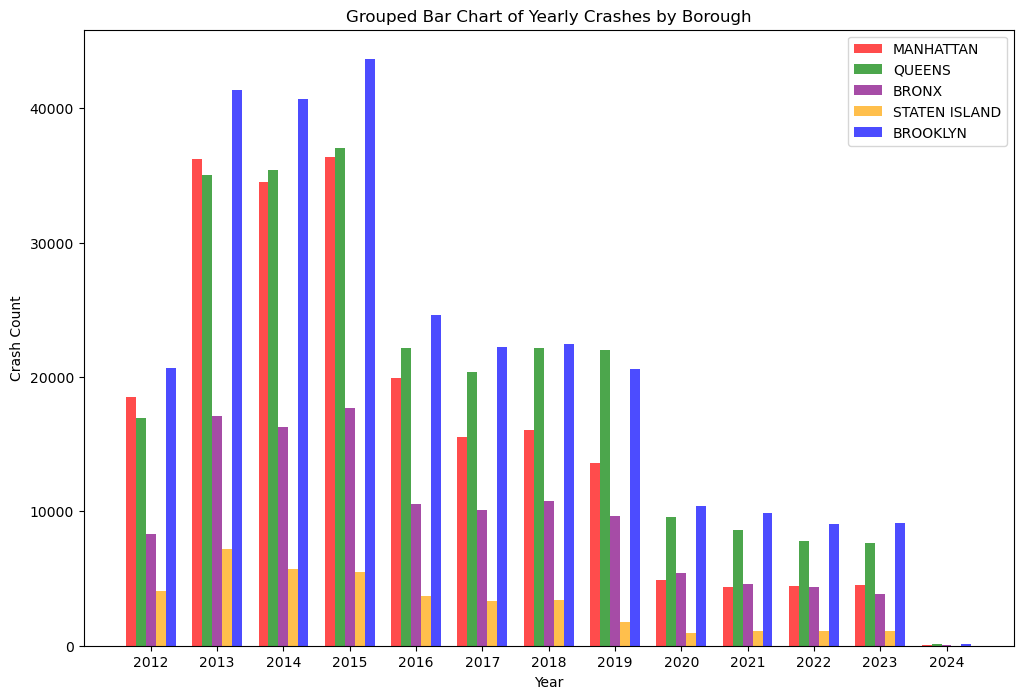

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('normalized_typed_data.csv')  # Replace with your actual dataset file

# Convert 'CRASH DATE' to datetime if not already done
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'],  errors='coerce', infer_datetime_format=True)  # Adjust the format if needed

# Extract year from 'CRASH DATE'
df['Year'] = df['CRASH DATE'].dt.year

# Group by 'Year' and 'BOROUGH' to get the count of crashes
crash_count_df = df.groupby(['Year', 'BOROUGH']).size().reset_index(name='Crash Count')

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
colors = {'BROOKLYN': 'blue', 'QUEENS': 'green', 'MANHATTAN': 'red', 'BRONX': 'purple', 'STATEN ISLAND': 'orange'}

boroughs = df['BOROUGH'].unique()
width = 0.15  # Width of each bar

for i, borough in enumerate(boroughs):
    borough_data = crash_count_df[crash_count_df['BOROUGH'] == borough]
    positions = np.arange(len(borough_data['Year'])) + i * width
    plt.bar(positions, borough_data['Crash Count'], label=borough, color=colors[borough], width=width, alpha=0.7)

plt.title('Grouped Bar Chart of Yearly Crashes by Borough')
plt.xlabel('Year')
plt.ylabel('Crash Count')
plt.xticks(np.arange(len(crash_count_df['Year'].unique())) + 0.3, crash_count_df['Year'].unique())
plt.legend()
plt.show()


/var/folders/sw/ydpk7dx52cbd5q0j4xt5kc_r0000gn/T/ipykernel_16612/2627463514.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('normalized_typed_data.csv')  # Replace with your actual dataset file
/var/folders/sw/ydpk7dx52cbd5q0j4xt5kc_r0000gn/T/ipykernel_16612/2627463514.py:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce', infer_datetime_format=True)  # Adjust the format if needed


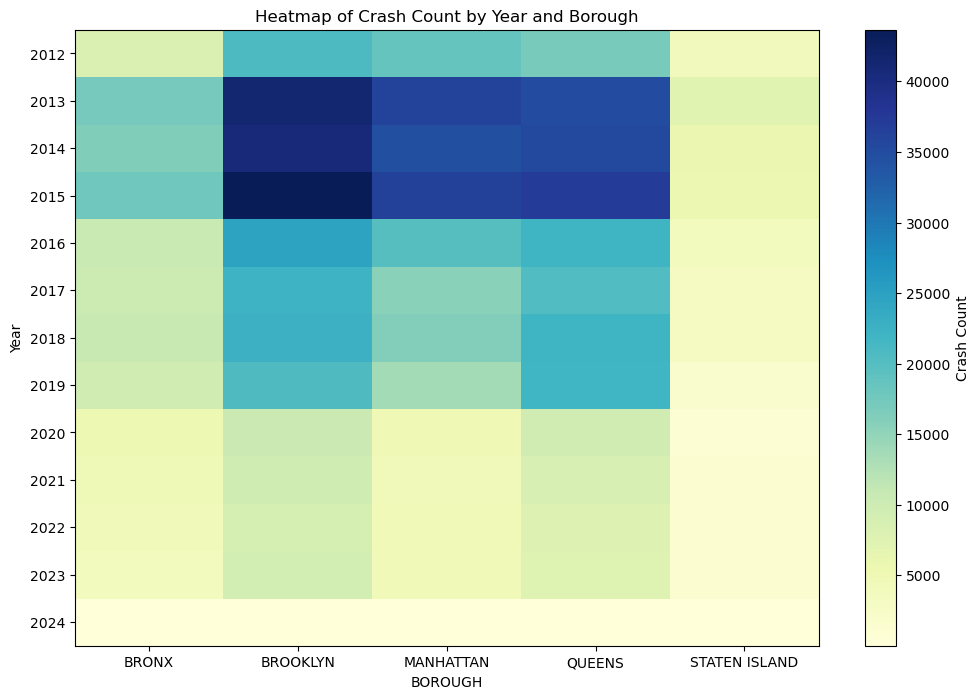

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv('normalized_typed_data.csv')  # Replace with your actual dataset file

# Convert 'CRASH DATE' to datetime if not already done
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce', infer_datetime_format=True)  # Adjust the format if needed

# Extract year from 'CRASH DATE'
df['Year'] = df['CRASH DATE'].dt.year

# Group by 'Year' and 'BOROUGH' to get the count of crashes
crash_count_df = df.groupby(['Year', 'BOROUGH']).size().reset_index(name='Crash Count')

# Pivot the dataframe to have 'Year' as rows, 'BOROUGH' as columns, and 'Crash Count' as values
pivot_df = crash_count_df.pivot_table(index='Year', columns='BOROUGH', values='Crash Count', aggfunc='sum')

# Create a heatmap using matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(pivot_df.values, cmap='YlGnBu', aspect='auto')

# Add labels and title
plt.xticks(np.arange(len(pivot_df.columns)), pivot_df.columns)
plt.yticks(np.arange(len(pivot_df.index)), pivot_df.index)
plt.xlabel('BOROUGH')
plt.ylabel('Year')
plt.title('Heatmap of Crash Count by Year and Borough')

# Add colorbar
plt.colorbar(label='Crash Count')

# Show the plot
plt.show()


/var/folders/sw/ydpk7dx52cbd5q0j4xt5kc_r0000gn/T/ipykernel_16612/3916528058.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('normalized_typed_data.csv')  # Replace with your actual dataset file


'Others' category is empty.


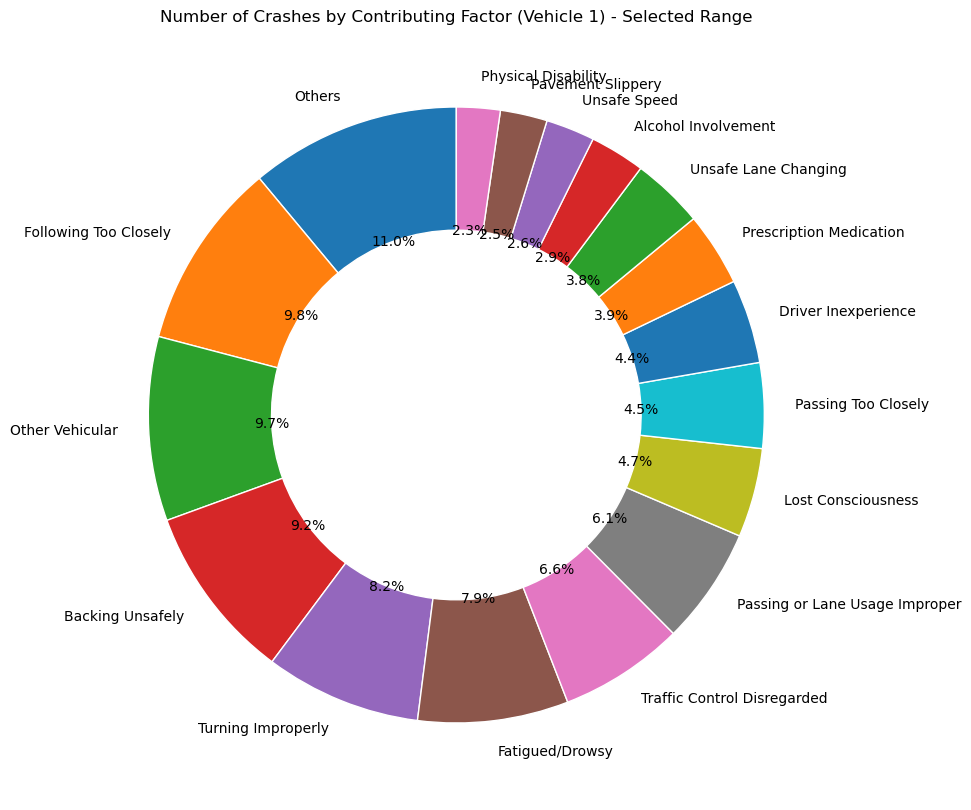

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
df = pd.read_csv('normalized_typed_data.csv')  # Replace with your actual dataset file

# Filter out rows where 'CONTRIBUTING FACTOR VEHICLE 1' is not available
df_filtered = df[df['CONTRIBUTING FACTOR VEHICLE 1'].notnull()]

# Group by 'CONTRIBUTING FACTOR VEHICLE 1' to get the count of crashes
factor_counts = df_filtered['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

# Filter factors within the specified range (more than 20,000 and less than 50,000)
selected_factors = factor_counts[(factor_counts > 2000) & (factor_counts < 50000)]

# Calculate the total number of crashes
total_crashes = selected_factors.sum()

# Calculate the percentage for each factor
factor_percentages = selected_factors / total_crashes * 100

# Combine factors with a percentage less than 1% into 'Others'
threshold = 2.1
others_mask = factor_percentages < threshold
others_sum = selected_factors[others_mask].sum()
others_list = selected_factors[others_mask].index.tolist()
selected_factors = selected_factors[~others_mask]
selected_factors['Others'] = others_sum

# Sort the selected factors by count in descending order
selected_factors = selected_factors.sort_values(ascending=False)

# Create a donut chart for selected factors
plt.figure(figsize=(10, 10))
plt.pie(selected_factors.values, labels=selected_factors.index, autopct='%1.1f%%', startangle=90,
        wedgeprops=dict(width=0.4, edgecolor='w'))  # Use wedgeprops to set the width and edge color
plt.title('Number of Crashes by Contributing Factor (Vehicle 1) - Selected Range')

# Display the list of factors included in 'Others' as a table
if isinstance(selected_factors['Others'], pd.Series) and not selected_factors['Others'].empty:
    others_df = pd.DataFrame({'Contributing Factor': ['Others'], 'Count': [selected_factors['Others']]})
    print("Factors included in 'Others':\n", others_df)
else:
    print("'Others' category is empty.")

plt.show()


/var/folders/sw/ydpk7dx52cbd5q0j4xt5kc_r0000gn/T/ipykernel_16612/1622848669.py:13: DtypeWarning: Columns (3,5,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/sw/ydpk7dx52cbd5q0j4xt5kc_r0000gn/T/ipykernel_16612/1622848669.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[time_column] = pd.to_datetime(df[time_column], errors='coerce')


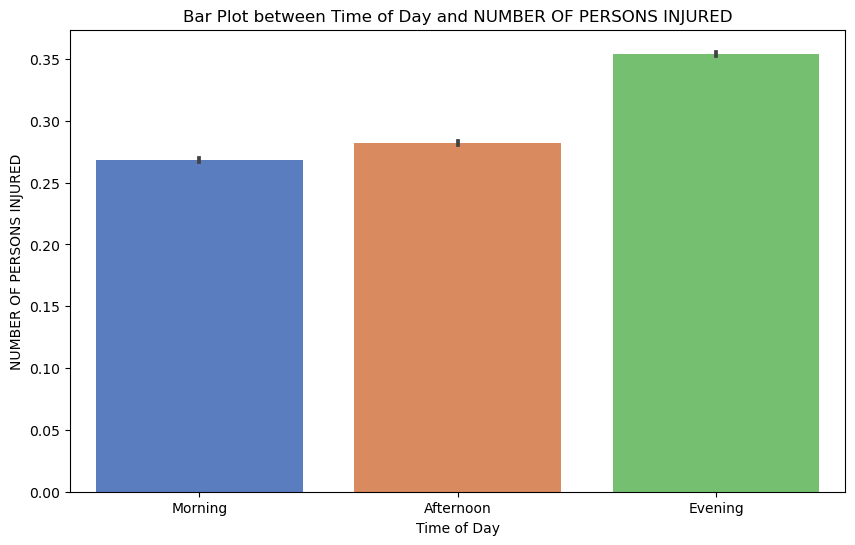

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'Motor_Vehicle_Collisions_-_Crashes.csv'

# Replace 'CRASH TIME' and 'NUMBER OF PERSONS INJURED' with your actual column names
time_column = 'CRASH TIME'
injured_column = 'NUMBER OF PERSONS INJURED'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Filter out rows where 'CRASH TIME' is not in a valid datetime format
df[time_column] = pd.to_datetime(df[time_column], errors='coerce')

# Drop rows with missing or invalid datetime values
df = df.dropna(subset=[time_column])

# Extract hour from 'CRASH TIME' to create a new variable 'TIME OF DAY'
df['TIME OF DAY'] = df[time_column].dt.hour.apply(
    lambda x: 'Morning' if 5 <= x < 12 else ('Afternoon' if 12 <= x < 17 else 'Evening')
)

# Visualize the relationship using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='TIME OF DAY', y=injured_column, data=df, palette='muted', order=['Morning', 'Afternoon', 'Evening'])
plt.title(f'Bar Plot between Time of Day and {injured_column}')
plt.xlabel('Time of Day')
plt.ylabel(injured_column)
plt.show()


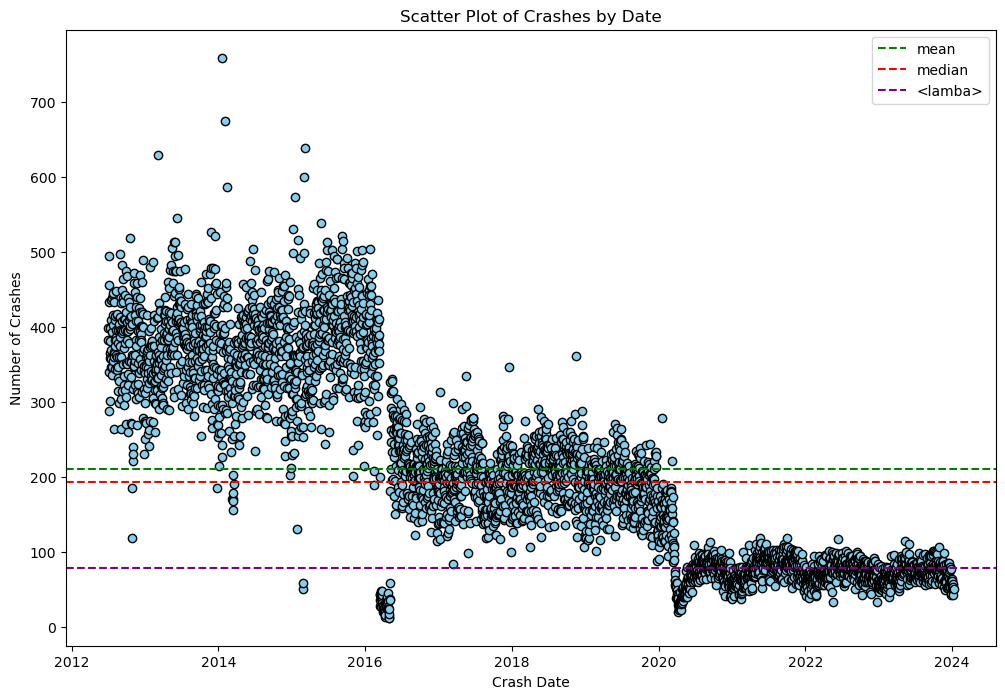

Mean: 210.58836104513065
Median: 193.0
Mode: 78.0


In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
df = pd.read_csv('normalized_typed_data.csv', low_memory=False)  # Specify low_memory=False to suppress the warning

# Convert 'CRASH DATE' to datetime if not already done
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')  # Remove infer_datetime_format argument

# Group by 'CRASH DATE' to get the count of crashes
crash_count_df = df.groupby('CRASH DATE').size().reset_index(name='Crash Count')

# Calculate mean, median, and mode for the number of crashes
crash_stats = crash_count_df['Crash Count'].agg(['mean', 'median', lambda x: x.mode().values[0] if not x.mode().empty else None])
mean, median, mode = crash_stats['mean'], crash_stats['median'], crash_stats['<lambda>']

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(crash_count_df['CRASH DATE'], crash_count_df['Crash Count'], color='skyblue', edgecolor='black')
plt.axhline(y=mean, color='green', linestyle='--', label='mean')
plt.axhline(y=median, color='red', linestyle='--', label='median')
plt.axhline(y=mode, color='purple', linestyle='--', label='<lamba>')
plt.xlabel('Crash Date')
plt.ylabel('Number of Crashes')
plt.title('Scatter Plot of Crashes by Date')
plt.legend()
plt.show()

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)


/var/folders/sw/ydpk7dx52cbd5q0j4xt5kc_r0000gn/T/ipykernel_16612/1033470373.py:31: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('normalized_typed_data.csv')


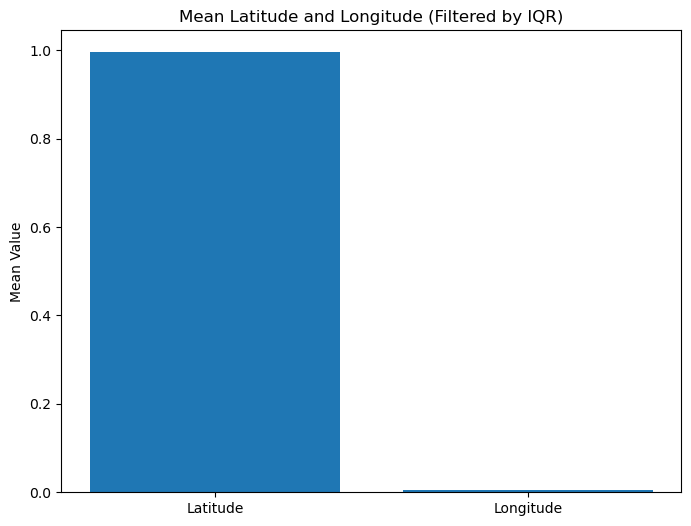

In [18]:
#IQR USING BAR PLOT 
import pandas as pd
import matplotlib.pyplot as plt

def calculate_iqr(data, column_name):
    """
    Calculate the interquartile range (IQR) for a given column in a DataFrame.
    
    Parameters:
        data (DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column for which to calculate the IQR.
    
    Returns:
        float: The interquartile range (IQR) for the specified column.
    """
    # Select the specified column
    column_data = data[column_name]
    
    # Calculate the first quartile (Q1)
    q1 = column_data.quantile(0.25)
    
    # Calculate the third quartile (Q3)
    q3 = column_data.quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    return iqr

# Load the dataset (replace 'your_data.csv' with the actual file path)
data = pd.read_csv('normalized_typed_data.csv')

# Choose the columns for analysis
column1_name = 'LATITUDE'
column2_name = 'LONGITUDE'

# Calculate the interquartile range (IQR) for the selected columns
iqr_column1 = calculate_iqr(data, column1_name)
iqr_column2 = calculate_iqr(data, column2_name)

# Filter out outliers based on IQR
filtered_data = data[(data[column1_name] >= data[column1_name].quantile(0.25) - 1.5 * iqr_column1) &
                     (data[column1_name] <= data[column1_name].quantile(0.75) + 1.5 * iqr_column1) &
                     (data[column2_name] >= data[column2_name].quantile(0.25) - 1.5 * iqr_column2) &
                     (data[column2_name] <= data[column2_name].quantile(0.75) + 1.5 * iqr_column2)]

# Calculate mean latitude and mean longitude
mean_latitude = filtered_data[column1_name].mean()
mean_longitude = filtered_data[column2_name].mean()

# Create a bar plot with mean latitude and mean longitude
plt.figure(figsize=(8, 6))
plt.bar(['Latitude', 'Longitude'], [mean_latitude, mean_longitude])
plt.title('Mean Latitude and Longitude (Filtered by IQR)')
plt.ylabel('Mean Value')
plt.show()
